In [55]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf
from xhistogram.xarray import histogram
import matplotlib.lines as mlines

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [2]:
# Load binned WBT data
ds = xr.open_dataset('../data/processed/WBT_binned.nc')

# Plot Time Series

In [112]:
def plot_thres3(region,ds,ax):
    # Get data for region
    ds_region = ds[region]
    
    # Normalize data to get PDF
    ds_region = ds_region/ds_region.sum(['WBT_bin','ensemble'])
    
    # Plot fraction of days per year above threshold temperatures
    ds_region.sel(WBT_bin=slice(25,None)).sum(['WBT_bin','ensemble']).plot(ax=ax,color='black',alpha=0.6)
    ds_region.sel(WBT_bin=slice(27.9,None)).sum(['WBT_bin','ensemble']).plot(ax=ax,color='black',alpha=0.6)
    ds_region.sel(WBT_bin=slice(30,None)).sum(['WBT_bin','ensemble']).plot(ax=ax,color='black',alpha=0.6)

    #fig.savefig(region+'thres.png')

In [102]:
def plot_ens(region,ds,ax):
    # Get data for region
    ds_region = ds[region]
    
    # Normalize data to get PDF, then make a percent
    ds_region = ds_region/ds_region.sum(['WBT_bin'])
    
    # Isolate data above threshold temperature
    ds_thres1 = ds_region.sel(WBT_bin=slice(25,None))
    ds_thres2 = ds_region.sel(WBT_bin=slice(27.9,None))
    ds_thres3 = ds_region.sel(WBT_bin=slice(30,None))
    
    # Loop through ensemble members
    for i in range (0,5):
        ds_thres1.isel(ensemble=i).sum(['WBT_bin']).plot(ax=ax,color='#1f77b4',alpha=0.8-.1*i)
        ds_thres2.isel(ensemble=i).sum(['WBT_bin']).plot(ax=ax,color='#ff7f0e',alpha=0.8-.1*i)
        ds_thres3.isel(ensemble=i).sum(['WBT_bin']).plot(ax=ax,color='#2ca02c',alpha=0.8-.1*i)

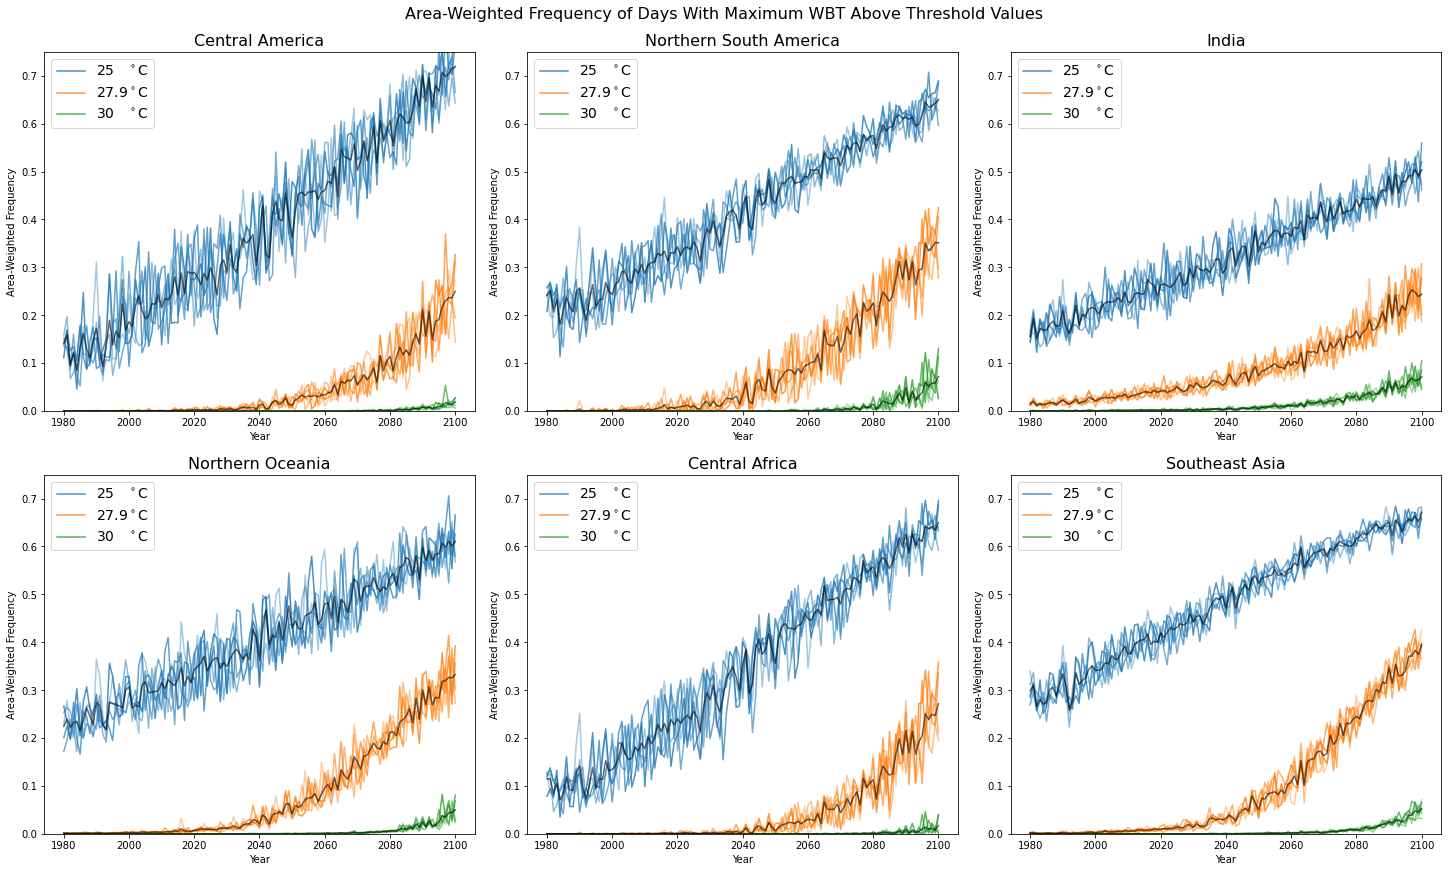

In [115]:
regions = ['Central America','Northern South America','India','Northern Oceania','Central Africa','Southeast Asia']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,12),nrows=2,ncols=3,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/3)][index%3]
    index+=1
    
    plot_ens(region,ds,ax)
    plot_thres3(region,ds,ax)
    ax.set_ylim(0,.75)
    ax.set_title(region,fontsize=16)
    ax.set_xlabel('Year')
    ax.set_ylabel('Area-Weighted Frequency')
    ax.legend(['25   $^\circ$C','27.9$^\circ$C','30   $^\circ$C'],loc='upper left',fontsize=14)
    
fig.suptitle('Area-Weighted Frequency of Days With Maximum WBT Above Threshold Values',fontsize=16)
fig.savefig('timeseries_ens.png')

# Combined Histograms

In [73]:
def hist(region,ds,ax):
    # Get data for region
    ds_region = ds[region]

    # Sum distributions over relevant decades
    ds_1980 = ds_region.sel(year = slice(1980,1989)).sum(['ensemble','year'])
    ds_2090 = ds_region.sel(year = slice(2090,2099)).sum(['ensemble','year'])

    # Normalize data to get PDF
    ds_1980 = ds_1980/ds_1980.sum()
    ds_2090 = ds_2090/ds_2090.sum()

    # Plot distributions
    ds_1980.plot(ax=ax,linewidth=2)
    ds_2090.plot(ax=ax,linewidth=2)

    # Set labels
    ax.set_xlabel('WBT (Celsius)')
    ax.set_ylabel('Frequency')

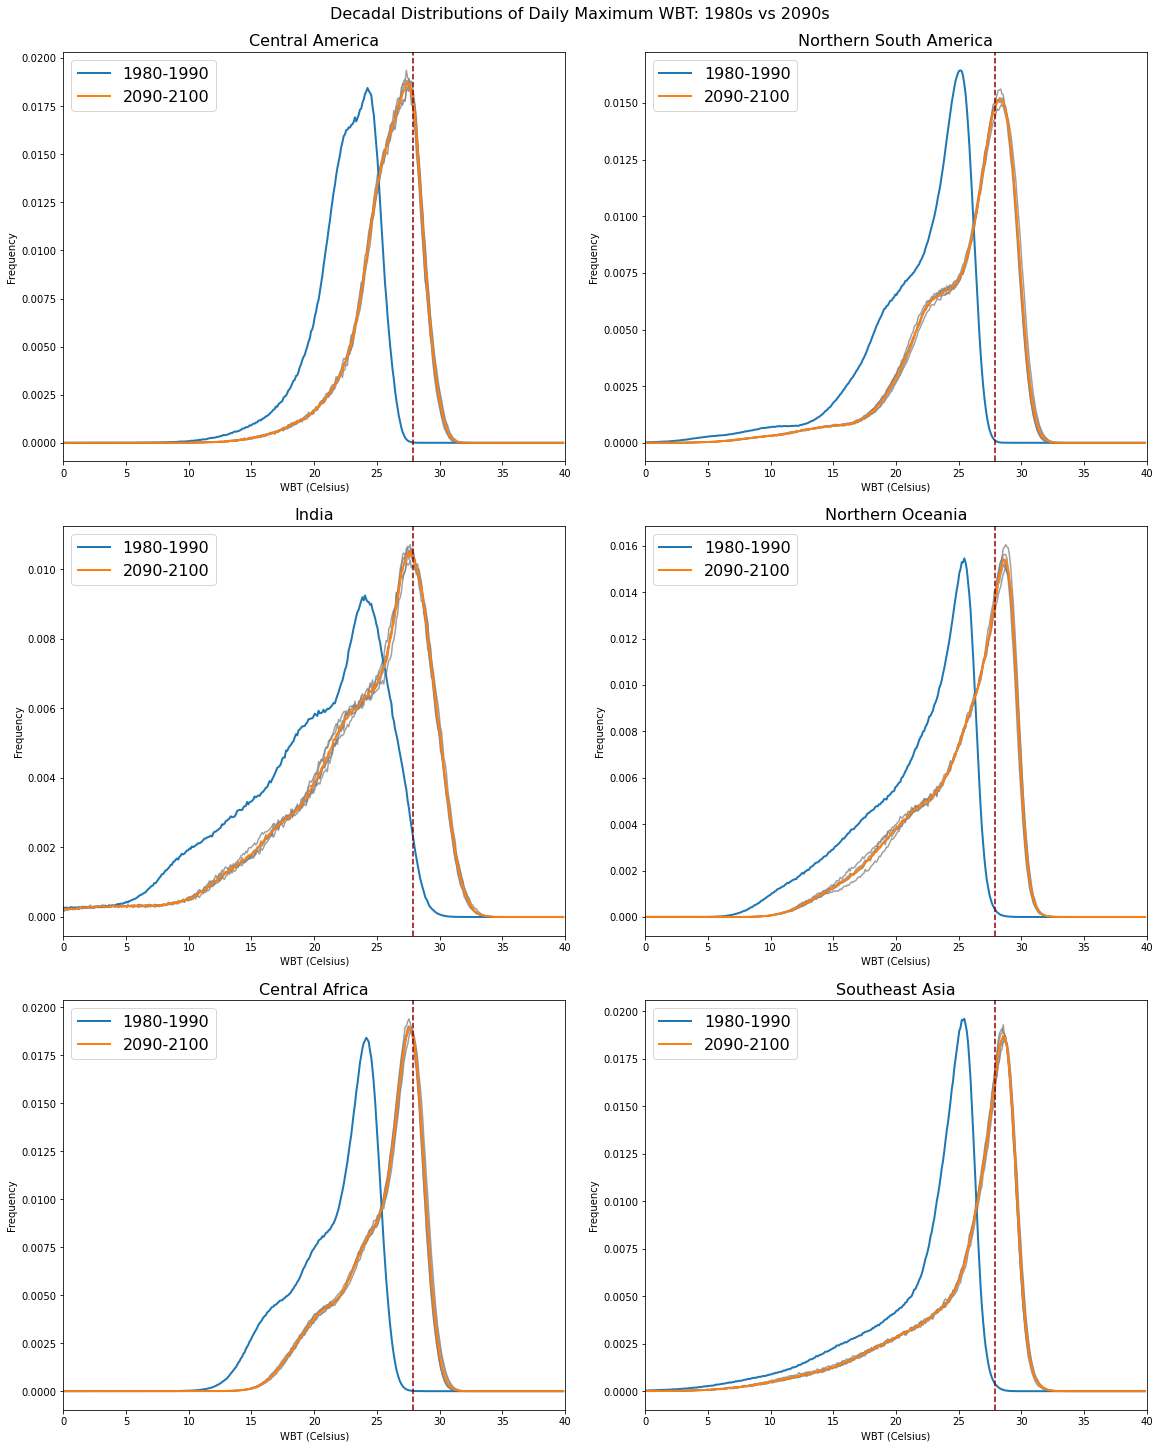

In [89]:
regions = ['Central America','Northern South America','India','Northern Oceania','Central Africa','Southeast Asia']

# Create figure and axes
fig, axs = plt.subplots(figsize=(16,20),nrows=3,ncols=2,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/2)][index%2]
    index+=1
    
    # Plot 2090 ensemble members
    ds_region = ds[region]
    ds_2090 = ds_region.sel(year = slice(2090,2099)).sum(['year'])
    ds_2090 = ds_2090/ds_2090.sum(['WBT_bin'])
    
    for i in range (0,5):
        ds_2090.isel(ensemble=i).plot(ax=ax,color='gray',alpha=0.75)
        
    # Plot two averages
    hist(region,ds,ax)
        
    ax.set_title(region,fontsize=16)
    ax.set_xlabel('WBT (Celsius)')
    ax.set_ylabel('Frequency')
    ax.set_xlim([0,40])
    ax.axvline(27.9,linestyle='--',color='darkred')
    
    blue_line = mlines.Line2D([], [], color='#1f77b4', label='1980-1990',linewidth=2)
    orange_line = mlines.Line2D([], [], color='#ff7f0e', label='2090-2100',linewidth=2)
    ax.legend(handles=[blue_line,orange_line],loc='upper left',fontsize=16)
    
fig.suptitle('Decadal Distributions of Daily Maximum WBT: 1980s vs 2090s',fontsize=16)
fig.savefig('new_ensemble_hist.png')